## Iris Dataset classification 
### Cross-Validation (10 times) Accuracy: 0.98 (+/- 0.09) (Mean Score and 95% CI of score estimate)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Here, I did an initial Naive Bayes classification separately with two classes just to get a sense of the dataset

#### Iris-virginica & Iris-setosa

In [2]:
filename = 'Iris.csv'
iris_df = pd.read_csv(filename, header=None)
iris_df.drop(iris_df.index[0],  inplace=True)

filter_df = iris_df[(iris_df[5] == 'Iris-virginica') | (iris_df[5] == 'Iris-setosa')]
X = filter_df[[1, 2, 3, 4]]
y = filter_df[5]
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))

Accuracy Score:  1.0


#### Iris-versicolor & Iris-setosa

In [3]:
filter_df = iris_df[(iris_df[5] == 'Iris-versicolor') | (iris_df[5] == 'Iris-setosa')]
X = filter_df[[1, 2, 3, 4]]
y = filter_df[5]
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))

Accuracy Score:  1.0


#### Iris-versicolor & Iris-virginica

In [4]:
filter_df = iris_df[(iris_df[5] == 'Iris-versicolor') | (iris_df[5] == 'Iris-virginica')]
X = filter_df[[1, 2, 3, 4]]
y = filter_df[5]
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))

Accuracy Score:  0.88


In [5]:
## So, clearly Iris-Versicolor and Iris-Virginica were harder to differentiate relative to the others. 

#### All three classes

In [6]:
# All 3 Classes
X = iris_df[[1, 2, 3, 4]]
y = iris_df[5]
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))


Accuracy Score:  0.973684210526


### 2nd Attempt using PCA

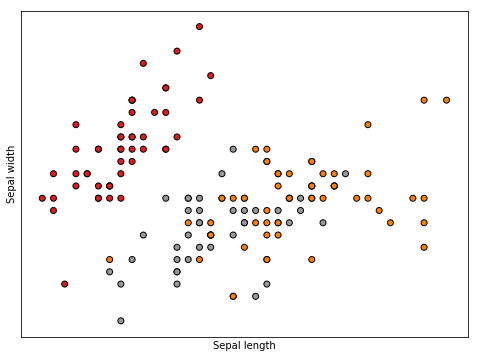

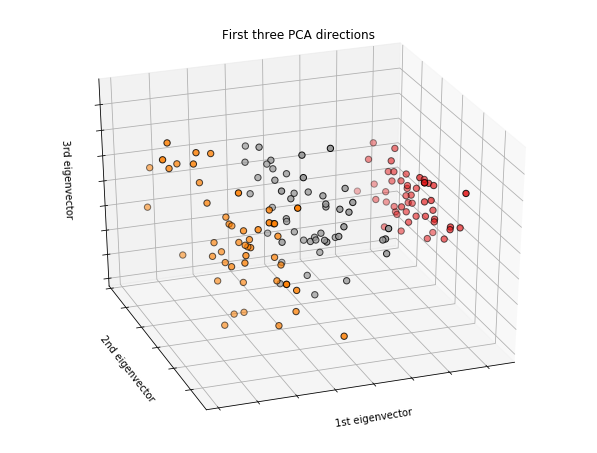

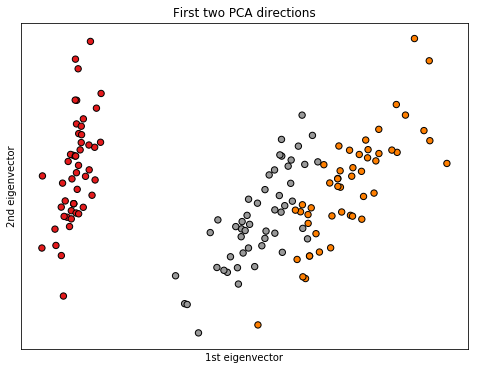

In [7]:
# 2D Plot of the Featureset
# (Used Scklearn as a guide for plotting)
X = iris_df[[1, 2]]
y = iris_df[5]
X = X.values
y = y.replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2]) 
y = y.values
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

# PCA: 3 Components
iris_data = iris_df[[1, 2, 3, 4]]
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris_data.values)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

# PCA: 2 Components
iris_data = iris_df[[1, 2, 3, 4]]
fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(iris_data.values)
# print(X_reduced.get_params())
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title('First two PCA directions')
plt.xlabel("1st eigenvector")
plt.xticks(())
plt.ylabel("2nd eigenvector")
plt.yticks(())
plt.show()


In [11]:
# Post NB-classification with PCA 
pca = decomposition.PCA()
iris_data = iris_df[[1, 2, 3, 4]]
pca.fit(iris_data.values)
# print(pca.explained_variance_)  
# Only the first 2 PC components were useful (Really, only the first PC is useful but decided to go with first 2)
pca.n_components = 2
X_reduced = pca.fit_transform(X)
# print(X_reduced.shape)
y = iris_df[5]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('PCA Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))


PCA Accuracy Score:  0.947368421053


### 3rd Attempt using LDA

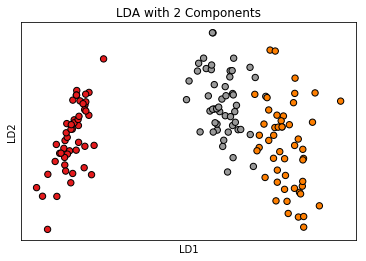

LDA Accuracy Score:  1.0


In [9]:
X = iris_df[[1, 2, 3, 4]]
y = iris_df[5]
y = y.replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2]) 
y = y.values
clf = LinearDiscriminantAnalysis(n_components=2)
X_lda = clf.fit_transform(X.values, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title('LDA with 2 Components')
plt.xlabel("LD1")
plt.xticks(())
plt.ylabel("LD2")
plt.yticks(())
plt.show()

# Clasification LDA components
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print('LDA Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_class))



In [10]:
scores = cross_val_score(clf, X.values, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # Mean Score and 95% CI of score estimate

[ 1.          1.          1.          1.          0.93333333  1.
  0.86666667  1.          1.          1.        ]
Accuracy: 0.98 (+/- 0.09)
